In [3]:
import numpy as np
import pandas as pd
data= pd.read_csv("D:/unzip/IMDb Movies India.csv",encoding='latin1')

In [4]:
print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [5]:
missing_values=data.isnull().sum()
print(missing_values)

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [6]:
data_filled_mean=data.fillna(data.mode())

In [7]:
print(data_filled_mean)

                                     Name    Year Duration            Genre  \
0                                         -2019.0  120 min            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   90 min   Drama, Musical   
3                                 #Yaaram -2019.0  110 min  Comedy, Romance   
4                       ...And Once Again -2010.0  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga -1988.0      NaN           Action   
15505                               Zulmi -1999.0  129 min    Action, Drama   
15506                           Zulmi Raj -2005.0      NaN           Action   
15507                       Zulmi Shikari -1988.0      NaN           Action   
15508                        Zulm-O-Sitam -1998.0  130 min    Action, Drama   

       Rating Votes            Director           A

In [9]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = data['Duration'].str.replace(' min', '')  # Remove ' min' and convert to numeric
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
print(data.dtypes)
print(data.isnull().sum())
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')
print(data.head())
print(data.isnull().sum())


Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       8961
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
                                 Name    Year  Duration            Genre  \
0                                         NaN       NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0     109.0            Drama   
2                         #Homecoming -2021.0      90.0   Drama, Musical   
3                             #Yaaram -2019.0     110.0  Comedy, Romance   
4                   ...And Once Again -2010.0     105.0            Drama   

   Rating  Votes            Director       Actor 1             Actor 2  \
0     NaN    NaN       J.S. Randhawa      Manmauji              Birbal  

In [10]:
data['Duration'] = data['Duration'].astype(str).str.replace(' min', '', regex=False)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
print(data.dtypes)
print(data.isnull().sum())
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')
print(data.head())
print(data.isnull().sum())

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
Name           0
Year         528
Duration    8269
Genre          0
Rating      7590
Votes       8961
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64
                                 Name    Year  Duration            Genre  \
0                                         NaN       NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0     109.0            Drama   
2                         #Homecoming -2021.0      90.0   Drama, Musical   
3                             #Yaaram -2019.0     110.0  Comedy, Romance   
4                   ...And Once Again -2010.0     105.0            Drama   

   Rating  Votes            Director       Actor 1             Actor 2  \
0     NaN    NaN       J.S. Randhawa      Manmauji              Birbal  

In [11]:
data['Year'] = data['Year'].fillna(data['Year'].median())
data['Duration'] = data['Duration'].fillna(data['Duration'].median())
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data['Votes'] = data['Votes'].fillna(data['Votes'].median())
print(data.isnull().sum())


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


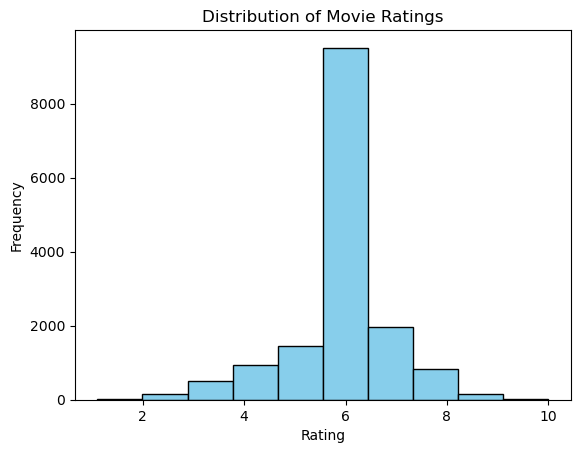

In [21]:
import matplotlib.pyplot as plt
plt.hist(data['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()


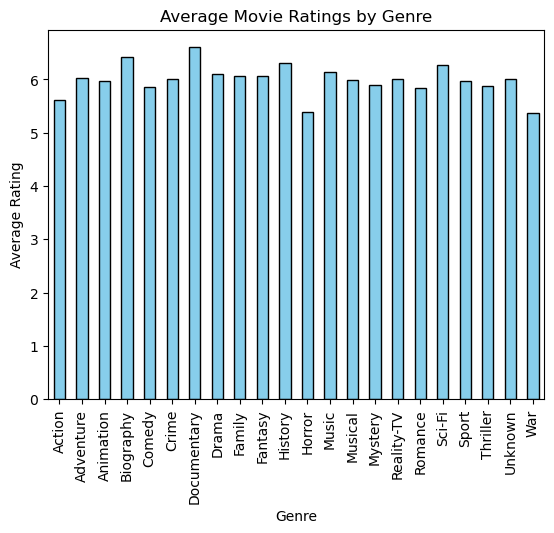

In [26]:
data['Primary Genre'] = data['Genre'].apply(lambda x: x.split(',')[0] if ',' in x else x)
genre_ratings = data.groupby('Primary Genre')['Rating'].mean()
genre_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings by Genre')
plt.show()


In [28]:
all_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
actor_counts = all_actors.value_counts()
print(actor_counts.head(10))

Unknown               7145
Mithun Chakraborty     241
Dharmendra             231
Ashok Kumar            227
Jeetendra              179
Amitabh Bachchan       178
Rekha                  142
Rajesh Khanna          139
Shashi Kapoor          133
Shatrughan Sinha       131
Name: count, dtype: int64


In [32]:
data.to_csv('cleaned_data.csv', index=False)
